In [41]:
import numpy as np
import matplotlib.pyplot as plt


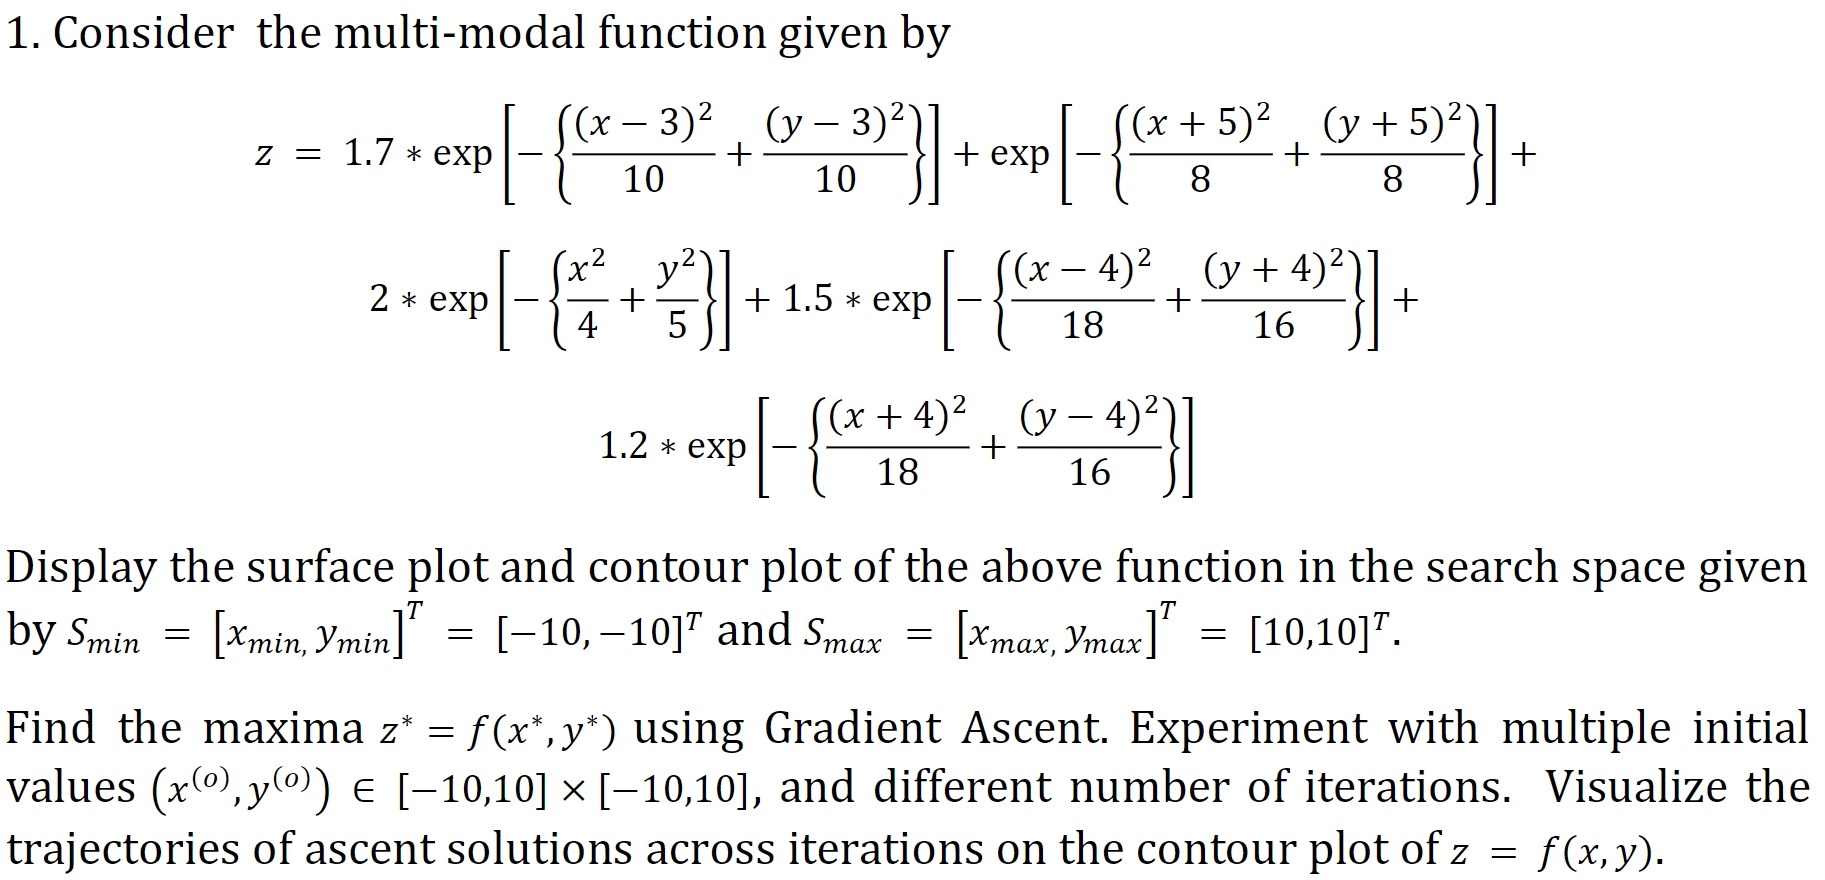

40000


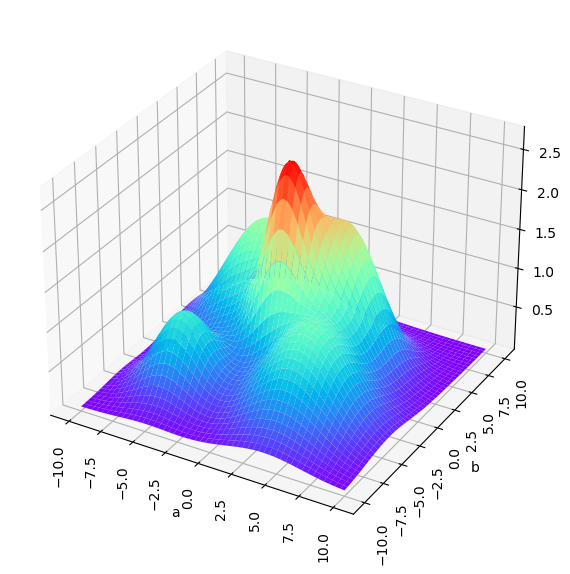

In [42]:
n = 200
x_min = -10
x_max = 10

X = np.linspace(-10,10,n)
Y = np.linspace(-10,10,n)
Z = []
for x in X:
    for y in Y:
        sum = -1*(((x-3)**2)/10 + ((y-3)**2)/10)
        z1 = 1.7*np.exp(sum)
        sum = -1*(((x+5)**2)/8 + ((y+5)**2)/8)
        z2 = 1*np.exp(sum)
        sum = -1*(((x)**2)/4 + ((y)**2)/5)
        z3 = 2*np.exp(sum)
        sum = -1*(((x-4)**2)/18 + ((y+4)**2)/16)
        z4 = 1.5*np.exp(sum)
        sum = -1*(((x+4)**2)/18 + ((y-4)**2)/16)
        z5 = 1.2*np.exp(sum)
        z = z1+z2+z3+z4+z5
        Z.append(z)
Z = np.array(Z)
print(len(Z))


X,Y = np.meshgrid(X,Y)
Z = Z.reshape(X.shape)

fig = plt.figure(figsize=(7,7))
ax = plt.axes(projection = '3d')
ax.plot_surface(X,Y,Z,cmap = 'rainbow')
plt.xticks(rotation=90)
plt.xlabel("a")
plt.yticks(rotation=90)
plt.ylabel("b")
plt.show()


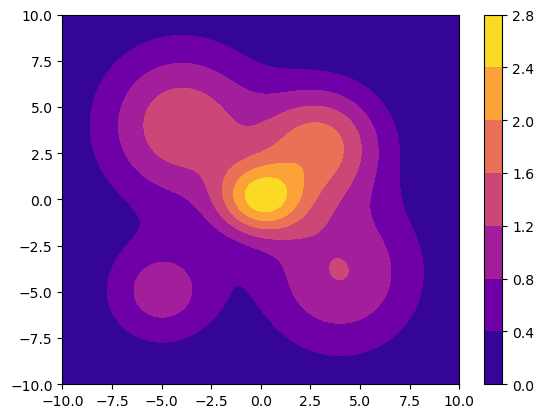

In [43]:
surf = plt.contourf(X,Y,Z,cmap = 'plasma')
plt.colorbar()
plt.show()

In [44]:
def gradient(x,y):
        sum = -1*(((x-3)**2)/10 + ((y-3)**2)/10)
        z1 = 1.7*np.exp(sum)
        sum = -1*(((x+5)**2)/8 + ((y+5)**2)/8)
        z2 = 1*np.exp(sum)
        sum = -1*(((x)**2)/4 + ((y)**2)/5)
        z3 = 2*np.exp(sum)
        sum = -1*(((x-4)**2)/18 + ((y+4)**2)/16)
        z4 = 1.5*np.exp(sum)
        sum = -1*(((x+4)**2)/18 + ((y-4)**2)/16)
        z5 = 1.2*np.exp(sum)
        dz_dx = z1*(-1*(x-3))/5+ z2*(-1*(x+5))/4 + z3*(-1*(x))/2 + z4*(-1*(x-4))/9 +z5*(-1*(x+4))/9
        dz_dy = z1*(-1*(y-3))/5 + z2*(-1*(y+5))/4 + z3*(-1*(y))/2.5 + z4*(-1*(y+4))/8 + z5*(-1*(y-4))/8
        return np.array([dz_dx,dz_dy]).T

In [45]:
Points = [] 
def gradient_acsent(iter,learn_rate,P): 
    k = iter
    while k > 0:
        Points.append(P)
        #Error.append(np.sum(Y - np.matmul(A,P)))
        P = P + learn_rate*(gradient(P[0],P[1]))
        k-=1
    return P

[-3.81795214  3.95236275]


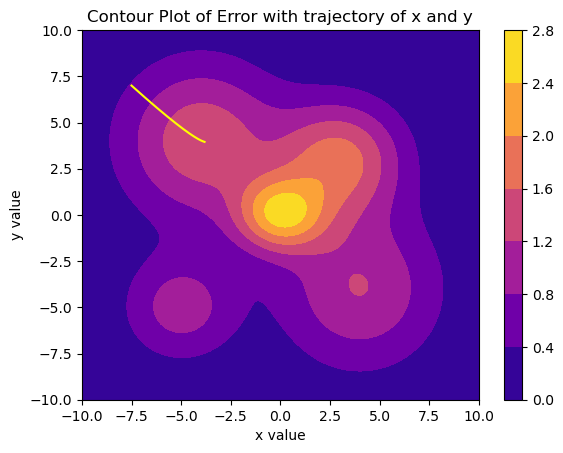

In [46]:
surf = plt.contourf(X,Y,Z,cmap = 'plasma')
plt.colorbar()     
P = np.array([-7.5,7]).T
learn_rate = 0.2
iter = 300
P = gradient_acsent(iter,learn_rate,P)
print(P)    
P = np.array(Points)
plt.plot(P[:,0],P[:,1],color = 'yellow' )
plt.title("Contour Plot of Error with trajectory of x and y")
plt.xlabel("x value")
plt.ylabel("y value")
plt.show()

[ 4.00466884 -3.92880602]


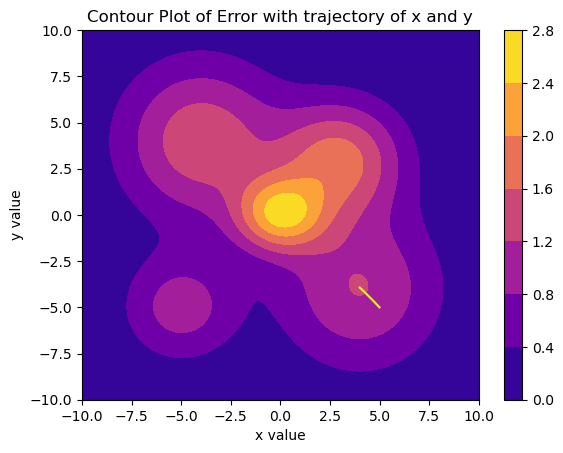

In [47]:
surf = plt.contourf(X,Y,Z,cmap = 'plasma')
plt.colorbar()  
Points = []  
P = np.array([5,-5]).T
learn_rate = 0.1
iter = 200
P = gradient_acsent(iter,learn_rate,P)
print(P)    
P = np.array(Points)
plt.plot(P[:,0],P[:,1],color = 'yellow' )
plt.title("Contour Plot of Error with trajectory of x and y")
plt.xlabel("x value")
plt.ylabel("y value")
plt.show()

[-4.93174085 -4.98648705]


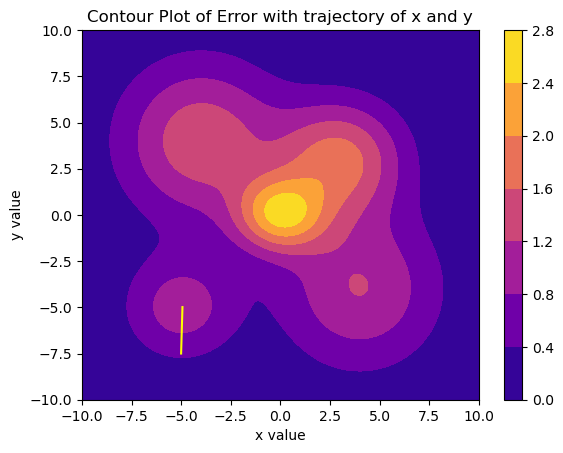

In [48]:
surf = plt.contourf(X,Y,Z,cmap = 'plasma')
plt.colorbar()  
Points = []  
P = np.array([-5,-7.5]).T
learn_rate = 0.1
iter = 200
P = gradient_acsent(iter,learn_rate,P)
print(P)    
P = np.array(Points)
plt.plot(P[:,0],P[:,1],color = 'yellow' )
plt.title("Contour Plot of Error with trajectory of x and y")
plt.xlabel("x value")
plt.ylabel("y value")
plt.show()

[0.37930965 0.49193246]


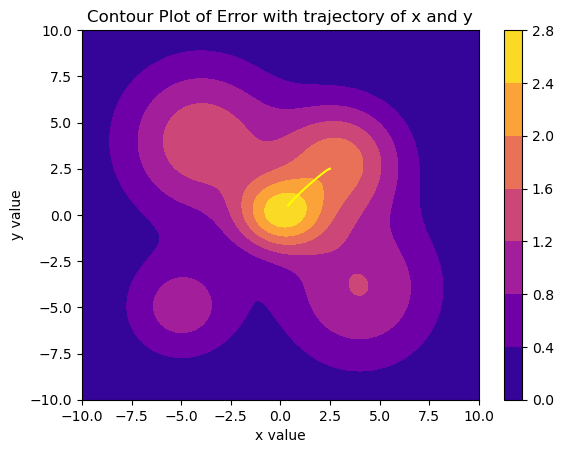

In [49]:
surf = plt.contourf(X,Y,Z,cmap = 'plasma')
plt.colorbar()  
Points = []  
P = np.array([2.5,2.5]).T
learn_rate = 0.1
iter = 200
P = gradient_acsent(iter,learn_rate,P)
print(P)    
P = np.array(Points)
plt.plot(P[:,0],P[:,1],color = 'yellow' )
plt.title("Contour Plot of Error with trajectory of x and y")
plt.xlabel("x value")
plt.ylabel("y value")
plt.show()

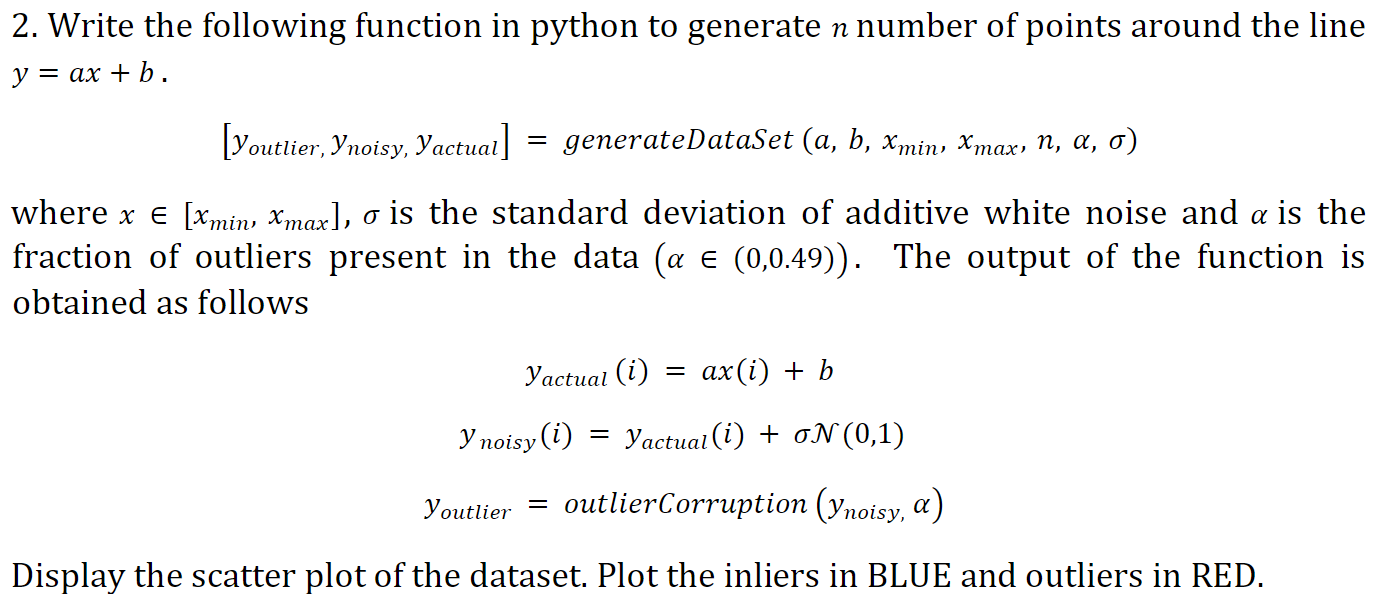



In [50]:
def outlierCorruption(y_noisy,no_outliers,sd):
    sd_outlier = np.mean(y_noisy)+25*sd
    y_noisy[:no_outliers//2] = y_noisy[:no_outliers//2] + np.random.uniform(low = -1,high = -0.6,size = no_outliers//2)*sd_outlier
    y_noisy[no_outliers//2:no_outliers] = y_noisy[no_outliers//2:no_outliers] + np.random.uniform(low = 0.6,high = 1,size = (no_outliers - no_outliers//2))*sd_outlier
    return y_noisy

def generateDataSet(a,b,x_min,x_max,n,alpha,sd):
    x = x_min + np.random.random(n)*(x_max - x_min)
    y_actual = a*x + b
    y_noisy = y_actual + np.random.randn(n)*sd
    no_outliers = int(n*alpha)
    y_noisy = outlierCorruption(y_noisy,no_outliers,sd)
    y_outlier = y_noisy[:no_outliers]
    return (x,y_actual,y_noisy,y_outlier)

[]

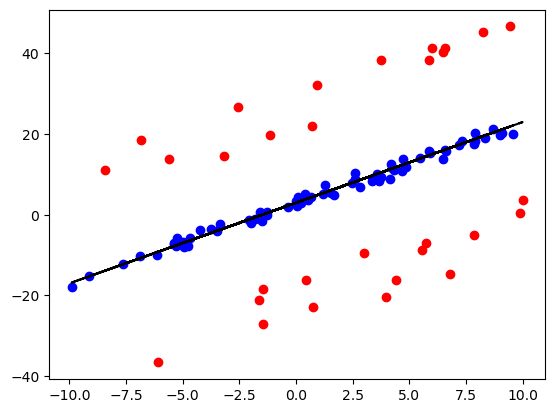

In [51]:
a = 2
b = 3
x_min = -10
x_max = 10
n = 100
alpha = 0.30
sd = 1

x,y_actual,y_noisy,y_outlier = generateDataSet(a,b,x_min,x_max,n,alpha,sd)
# we made starting alpha percentage points as outliers
plt.scatter(x[:int(n*alpha)],y_noisy[:int(n*alpha)],color = 'red')
plt.scatter(x[int(n*alpha):],y_noisy[int(n*alpha):],color = 'blue')
plt.plot(x,y_actual,color= 'black')
plt.plot()

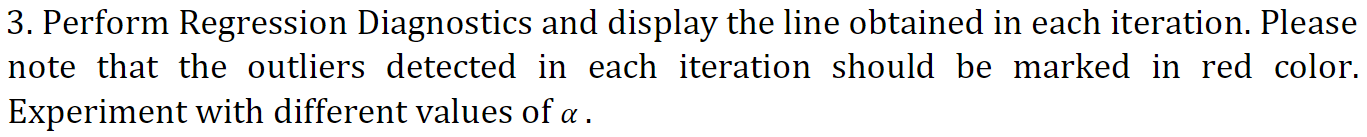

In [52]:
def fit_line(X,noisy_Y):
    X = X.reshape(-1,1)
    Y = noisy_Y.reshape(-1,1)
    ones = np.ones(len(X)).reshape(-1,1)
    A = np.hstack((ones,X))
    #print(np.linalg.pinv(A)@Y)
    P = np.array([-10,10]).reshape(-1,1)
    #print(P)
    learn_rate = 0.01
    k = 300
    At_Y = (-2/n) * np.matmul(A.T,Y)
    At_A = (2/n) * np.matmul(A.T,A)
    Points = []
    while k > 0:
        Points.append(P)
        #Error.append(np.sum(Y - np.matmul(A,P)))
        P = P - learn_rate*(At_Y+np.matmul(At_A,P))
        k-=1
    #print(P)   
    return P

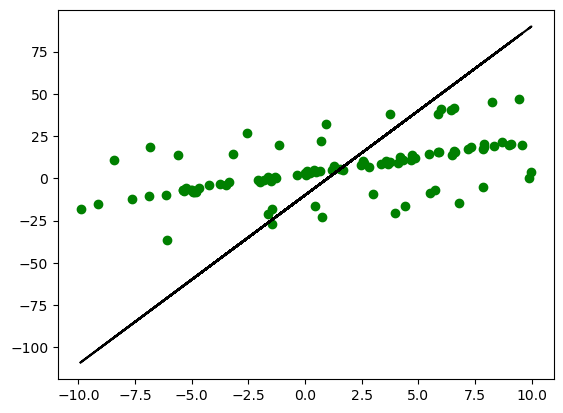

[[3.22961229]
 [1.75025201]]


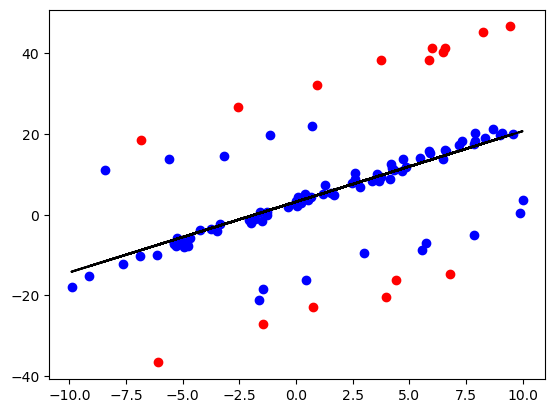

[[2.31049362]
 [1.44648913]]


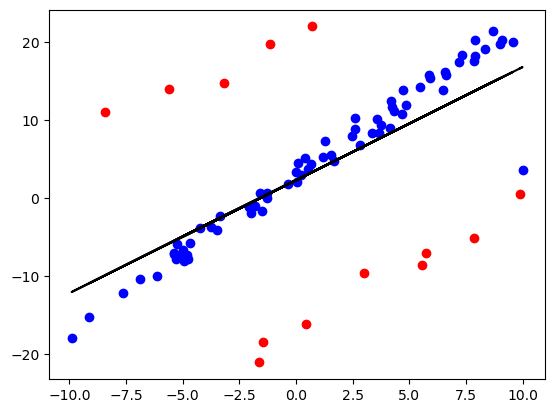

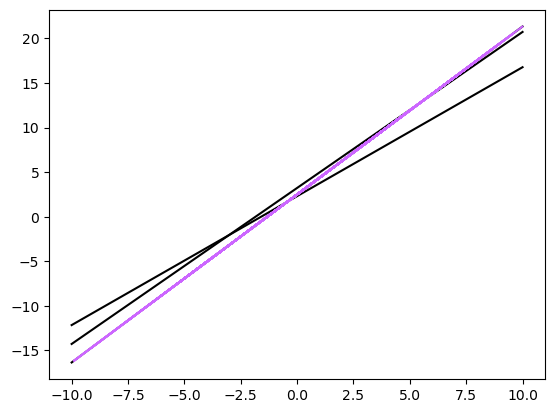


 Final Parameters of Model :
 [2.49747725] [1.88466058]


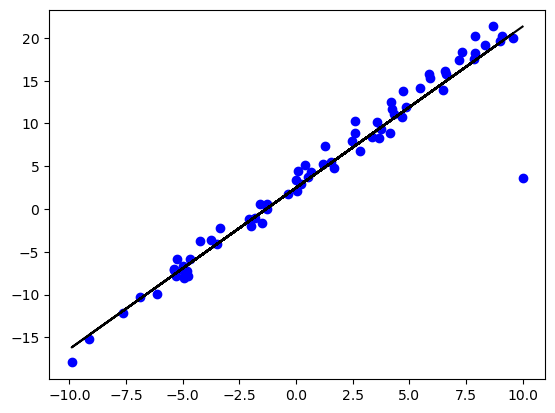

In [53]:
max_iter = 10
old_len = len(y_noisy)
percentage_inliers = 0.75
k = 0
P = np.array([-10,10])


plt.scatter(x[:int(n*alpha)],y_noisy[:int(n*alpha)],color = 'green')
plt.scatter(x[int(n*alpha):],y_noisy[int(n*alpha):],color = 'green')
plt.plot(x,P[1]*x+P[0],color = 'black')
plt.show()

len_ = len(y_noisy)
parameters = []

old_x = x
old_y = y_noisy

while max_iter > k and (len(y_noisy)/len_) >= percentage_inliers:
    P = fit_line(x,y_noisy)  
    parameters.append(P)
    print(P)
    #print((len(y_noisy),old_len))
    E = np.abs(y_noisy - (P[1]*x+P[0]))
    mean_E = np.mean(E)
    std_E = np.std(E) 
    l = 1.5

    #print((mean_E+l*std_E))
    #print(E)
    outlier_indices = np.argwhere(E >= (mean_E+l*std_E))
    #print(outlier_indices)
    old_len = len(y_noisy)
    inlier_indices = np.setdiff1d(np.arange(old_len),outlier_indices)

    plt.scatter(x[outlier_indices],y_noisy[outlier_indices],color = 'red')
    plt.scatter(x[inlier_indices],y_noisy[inlier_indices],color = 'blue')
    plt.plot(x,P[1]*x+P[0],color = 'black')
    plt.show()

    y_noisy = y_noisy[inlier_indices]
    x = x[inlier_indices]
    k+=1

P = fit_line(x,y_noisy)
parameters.append(P)
new_x = np.linspace(x_min,x_max,100)
for P in parameters:
    plt.plot(new_x,P[1]*new_x+P[0],color = 'black')  
plt.plot(x,P[1]*x+P[0],color = '#cc66ff')      
plt.show()

print("\n Final Parameters of Model :\n",P[0],P[1])    
plt.scatter(x,y_noisy,color = 'blue')
plt.plot(x,P[1]*x+P[0],color = 'black')
plt.show()    

# plt.scatter(old_x[:int(n*alpha)],old_y[:int(n*alpha)],color = 'red')
# plt.scatter(old_x[int(n*alpha):],old_y[int(n*alpha):],color = 'blue')




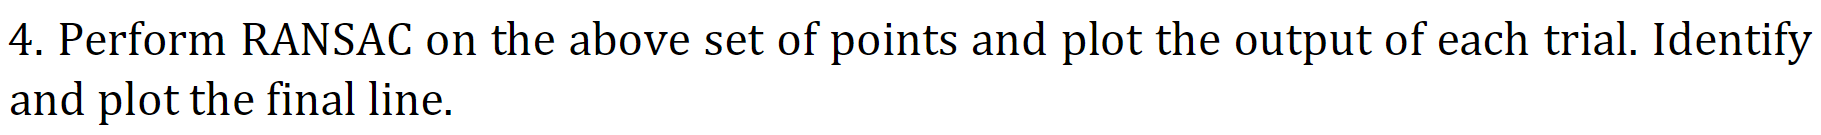

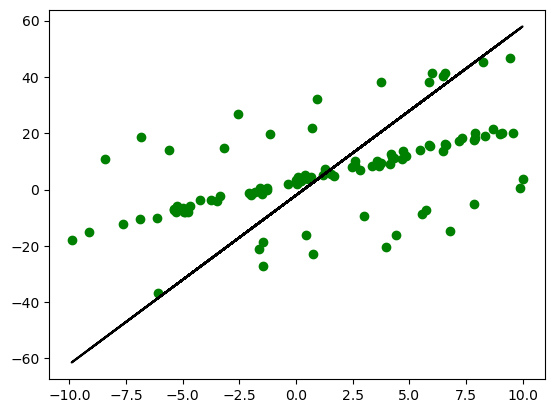

In [54]:
old_len = len(y_noisy)
x = old_x
y_noisy = old_y 

shuffle_indices = np.arange(len(x))
rng = np.random.default_rng()
rng.shuffle(shuffle_indices)

x = x[shuffle_indices]
y_noisy = y_noisy[shuffle_indices]
P = np.array([-2,6])

plt.scatter(x[:int(n*alpha)],y_noisy[:int(n*alpha)],color = 'green')
plt.scatter(x[int(n*alpha):],y_noisy[int(n*alpha):],color = 'green')
plt.plot(x,P[1]*x+P[0],color = 'black')
plt.show()

len_ = len(y_noisy)
parameters = []

percentage_inliers = 0.7
k = 0
sample_points = 10


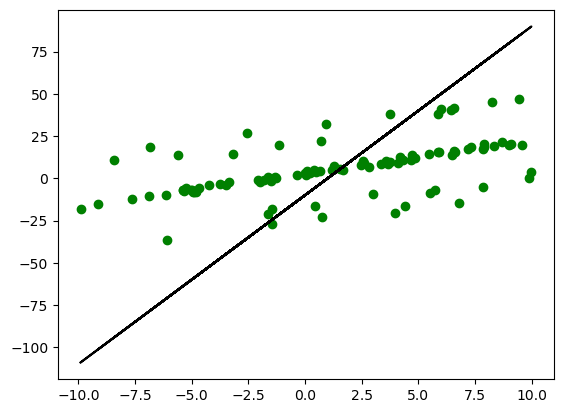

[[0.52368331]
 [1.72207264]]


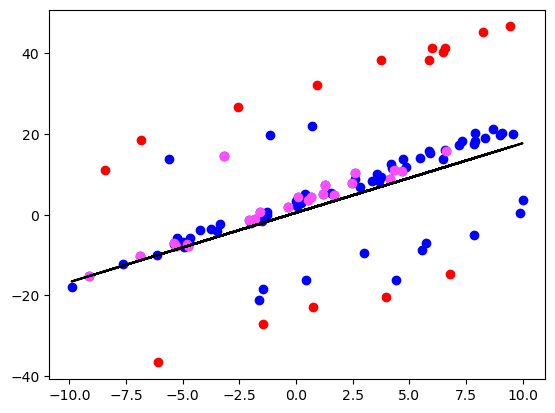

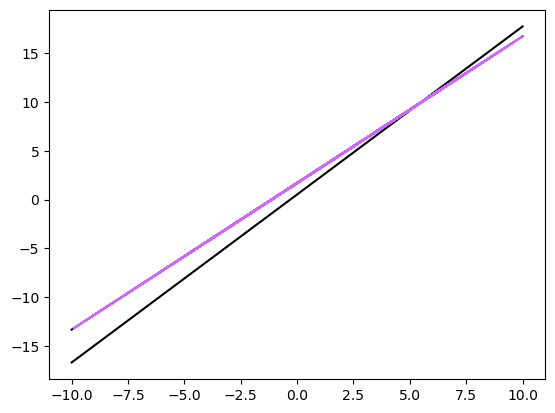

Total number of trailS :  5226

 Final Parameters of Model :
 [1.70092549] [1.50277433]


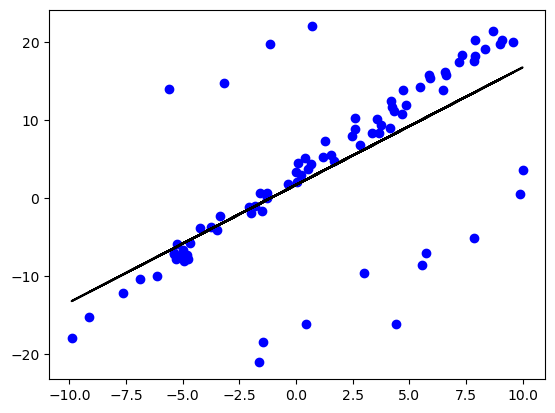

In [55]:
max_iter = 10
old_len = len(y_noisy)
percentage_inliers = 0.7
k = 0
sample_points = 25


x = old_x
y_noisy = old_y 

shuffle_indices = np.arange(len(x))
rng = np.random.default_rng()
rng.shuffle(shuffle_indices)

x = x[shuffle_indices]
y_noisy = y_noisy[shuffle_indices]
P = np.array([-10,10])

plt.scatter(x[:int(n*alpha)],y_noisy[:int(n*alpha)],color = 'green')
plt.scatter(x[int(n*alpha):],y_noisy[int(n*alpha):],color = 'green')
plt.plot(x,P[1]*x+P[0],color = 'black')
plt.show()

len_ = len(y_noisy)
parameters = []
Trails = 0

while max_iter > k and (len(y_noisy)/len_) >= percentage_inliers:
    Trails+=1
    sample_indices = np.random.randint(low = 0,high = len(y_noisy),size = sample_points)
    sample_x = x[sample_indices]
    sample_y_noisy = y_noisy[sample_indices]

    P = fit_line(sample_x,sample_y_noisy)  
    #print(P)

    Sample_Error = np.mean(np.abs(sample_y_noisy - (P[1]*sample_x+P[0])))
    if Sample_Error < 3:
        parameters.append(P)
        print(P)
        #print((len(y_noisy),old_len))
        E = np.abs(y_noisy - (P[1]*x+P[0]))
        mean_E = np.mean(E)
        std_E = np.std(E) 
        l = 1.5

        #print((mean_E+l*std_E))
        #print(E)
        outlier_indices = np.argwhere(E >= (mean_E+l*std_E))
        #print(outlier_indices)
        old_len = len(y_noisy)
        inlier_indices = np.setdiff1d(np.arange(old_len),outlier_indices)

        plt.scatter(x[outlier_indices],y_noisy[outlier_indices],color = 'red')
        plt.scatter(x[inlier_indices],y_noisy[inlier_indices],color = 'blue')
        plt.scatter(sample_x,sample_y_noisy,color = '#ff4dff')
        plt.plot(x,P[1]*x+P[0],color = 'black')
        plt.show()
        y_noisy = y_noisy[inlier_indices]
        x = x[inlier_indices]
        k+=1
        break

P = fit_line(x,y_noisy)
parameters.append(P)
new_x = np.linspace(x_min,x_max,100)
for P in parameters:
    plt.plot(new_x,P[1]*new_x+P[0],color = 'black')
plt.plot(x,P[1]*x+P[0],color = '#cc66ff')    
plt.show()
print("Total number of trailS : ",Trails)
print("\n Final Parameters of Model :\n",P[0],P[1])    
plt.scatter(x,y_noisy,color = 'blue')
plt.plot(x,P[1]*x+P[0],color = 'black')
plt.show()    

# plt.scatter(old_x[:int(n*alpha)],old_y[:int(n*alpha)],color = 'red')
# plt.scatter(old_x[int(n*alpha):],old_y[int(n*alpha):],color = 'blue')




#print("\n Final Model ParameterS : ",P[0],P[1])

## Combination of both Outliers Dignostics and RANSAC

[[-0.38892283]
 [ 2.08677019]]


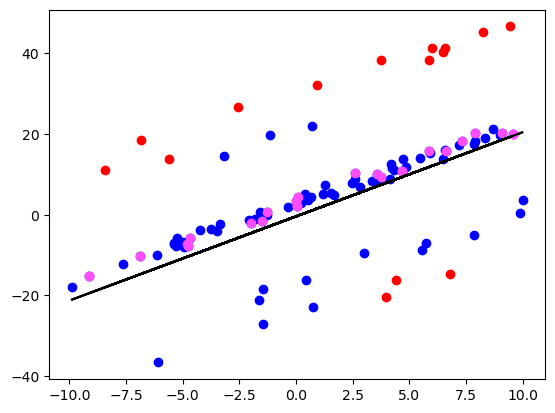

[[-0.23867069]
 [ 2.09242773]]


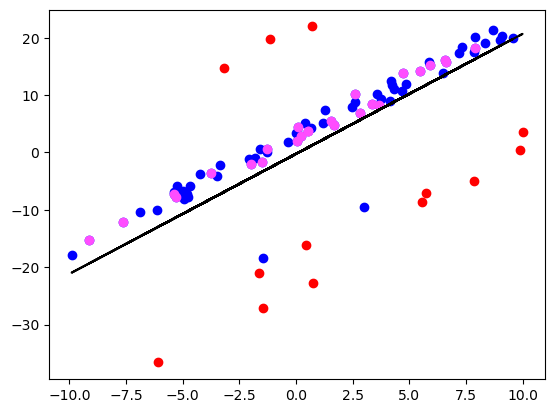

[[-0.17162081]
 [ 1.89162368]]


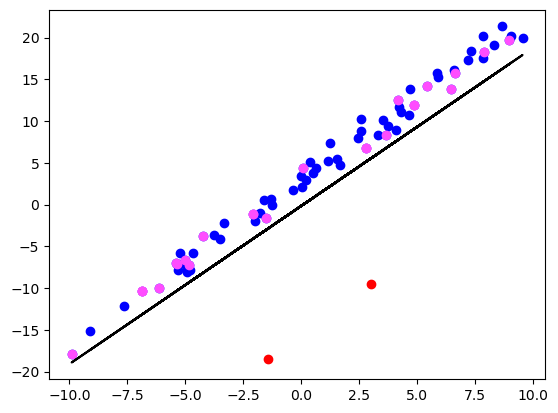

[[-0.04751876]
 [ 2.03738382]]


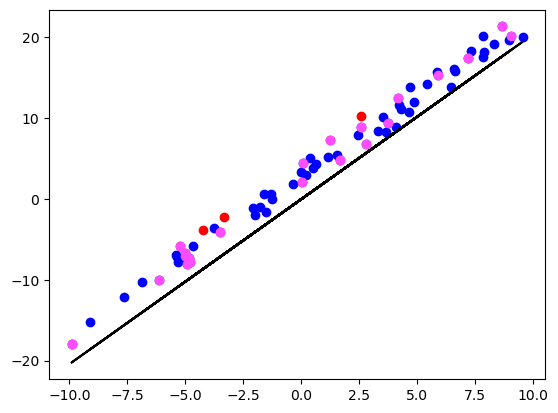

Number of Trails :  1855


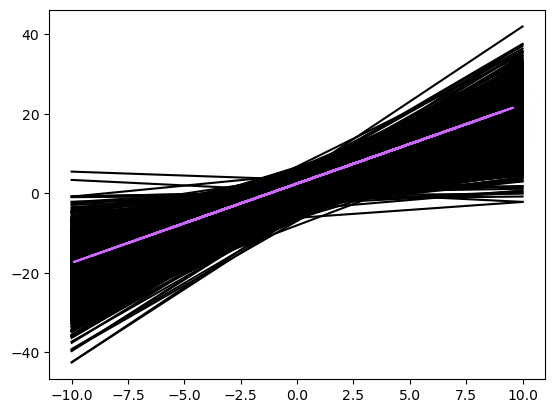


 Final Parameters of Model :
 [2.42347315] [1.99369863]


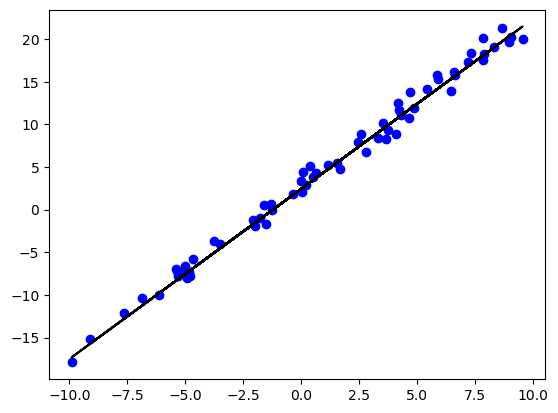

In [56]:
parameters = []
Trails = 0
x = old_x
y_noisy = old_y

while max_iter > k and (len(y_noisy)/len_) >= percentage_inliers:
    Trails+=1
    sample_indices = np.random.randint(low = 0,high = len(y_noisy),size = sample_points)
    sample_x = x[sample_indices]
    sample_y_noisy = y_noisy[sample_indices]

    P = fit_line(sample_x,sample_y_noisy)  
    #print(P)
    parameters.append(P)
    Sample_Error = np.mean(np.abs(sample_y_noisy - (P[1]*sample_x+P[0])))
    if Sample_Error < 3:
        
        print(P)
        #print((len(y_noisy),old_len))
        E = np.abs(y_noisy - (P[1]*x+P[0]))
        mean_E = np.mean(E)
        std_E = np.std(E) 
        l = 1.5

        #print((mean_E+l*std_E))
        #print(E)
        outlier_indices = np.argwhere(E >= (mean_E+l*std_E))
        #print(outlier_indices)
        old_len = len(y_noisy)
        inlier_indices = np.setdiff1d(np.arange(old_len),outlier_indices)

        plt.scatter(x[outlier_indices],y_noisy[outlier_indices],color = 'red')
        plt.scatter(x[inlier_indices],y_noisy[inlier_indices],color = 'blue')
        plt.scatter(sample_x,sample_y_noisy,color = '#ff4dff')
        plt.plot(x,P[1]*x+P[0],color = 'black')
        plt.show()

        y_noisy = y_noisy[inlier_indices]
        x = x[inlier_indices]
        k+=1

P = fit_line(x,y_noisy)
parameters.append(P)
print("Number of Trails : ",Trails)
new_x = np.linspace(x_min,x_max,100)
for P in parameters:
    plt.plot(new_x,P[1]*new_x+P[0],color = 'black')

plt.plot(x,P[1]*x+P[0],color = '#cc66ff')    
plt.show()

print("\n Final Parameters of Model :\n",P[0],P[1])    
plt.scatter(x,y_noisy,color = 'blue')
plt.plot(x,P[1]*x+P[0],color = 'black')
plt.show()    

# plt.scatter(old_x[:int(n*alpha)],old_y[:int(n*alpha)],color = 'red')
# plt.scatter(old_x[int(n*alpha):],old_y[int(n*alpha):],color = 'blue')




#print("\n Final Model ParameterS : ",P[0],P[1])